# Decision Tree: 공유자전거 수요 예측모델 만들기

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 데이터 살펴보기

In [70]:
url = 'https://github.com/DSNote/fastcampus/raw/main/bike.csv'

In [71]:
bike_df = pd.read_csv(url)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       6771 non-null   float64
 13  snow_1h       326 non-null    float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [72]:
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,NaN,NaN,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,NaN,NaN,1,Clear


In [73]:
bike_df[bike_df['holiday']==0]['workingday'].value_counts()

1    22742
0     9615
Name: workingday, dtype: int64

In [74]:
bike_df[bike_df['holiday']==1]['workingday'].value_counts()

0    1022
Name: workingday, dtype: int64

In [75]:
bike_df.describe()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all
count,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,6771.000000,326.000000,33379.000000
mean,333.139788,0.030618,0.681327,15.213087,14.994843,13.532648,16.105542,1017.071602,67.818628,1.829340,174.022919,1.216475,0.641380,63.213997
std,336.519514,0.172283,0.465969,9.908964,11.176487,9.993094,9.984839,7.379420,18.422105,1.703747,113.844334,2.056222,0.571087,30.825936
min,0.000000,0.000000,0.000000,-12.790000,-18.910000,-15.140000,-12.290000,980.000000,14.000000,0.000000,0.000000,0.100000,0.100000,0.000000
25%,59.000000,0.000000,0.000000,6.860000,5.880000,5.230000,7.730000,1012.000000,53.000000,0.450000,62.000000,0.250000,0.250000,40.000000
50%,236.000000,0.000000,1.000000,15.650000,15.020000,13.910000,16.590000,1017.000000,70.000000,1.340000,180.000000,0.530000,0.420000,75.000000
75%,495.000000,0.000000,1.000000,23.800000,24.140000,21.970000,24.390000,1022.000000,84.000000,2.600000,285.000000,1.300000,1.000000,90.000000
max,2038.000000,1.000000,1.000000,36.710000,43.710000,35.380000,38.810000,1044.000000,100.000000,16.980000,360.000000,54.050000,3.300000,100.000000


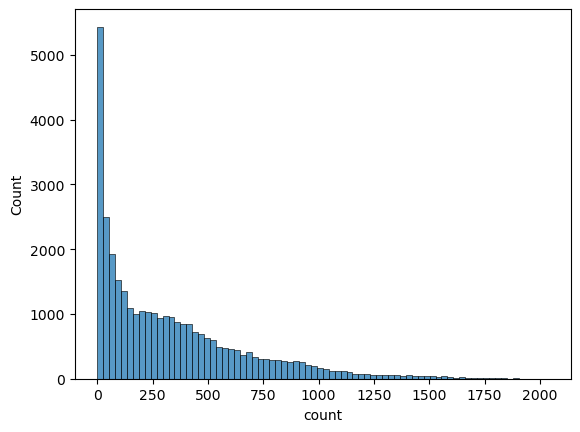

In [76]:
sns.histplot(data=bike_df, x='count')
plt.show()

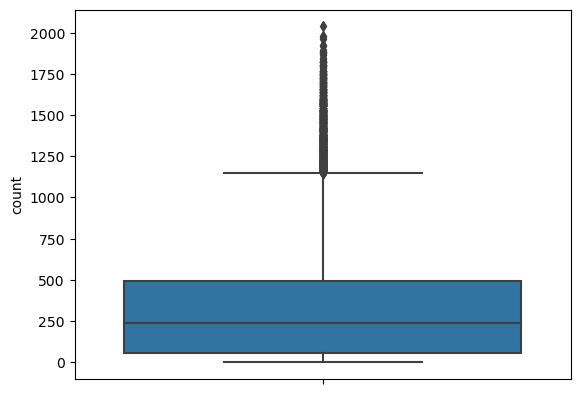

In [77]:
sns.boxplot(data=bike_df, y='count')
plt.show()

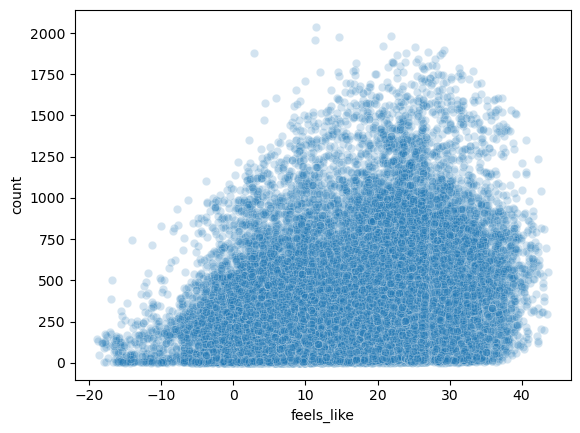

In [78]:
sns.scatterplot(data=bike_df, x='feels_like', y='count', alpha=0.2)
plt.show()

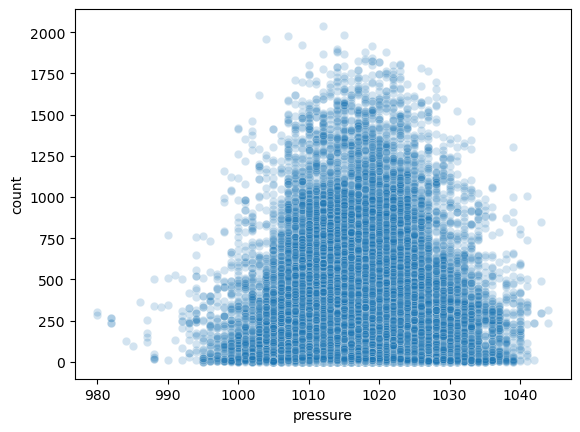

In [79]:
sns.scatterplot(data=bike_df, x='pressure', y='count', alpha=0.2)
plt.show()

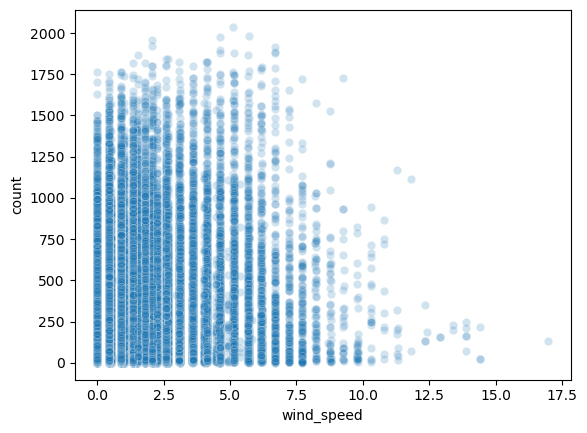

In [80]:
sns.scatterplot(data=bike_df, x='wind_speed', y='count', alpha=0.2)
plt.show()

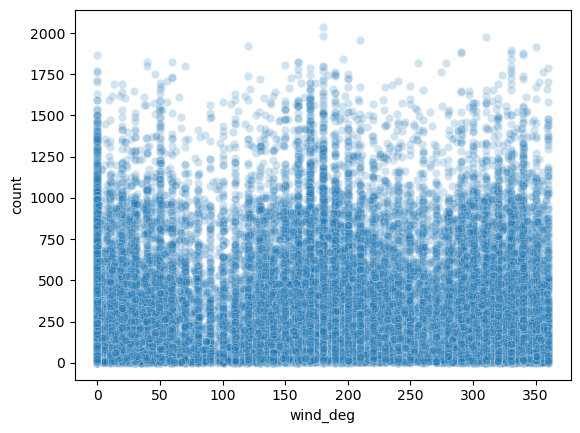

In [81]:
sns.scatterplot(data=bike_df, x='wind_deg', y='count', alpha=0.2)
plt.show()

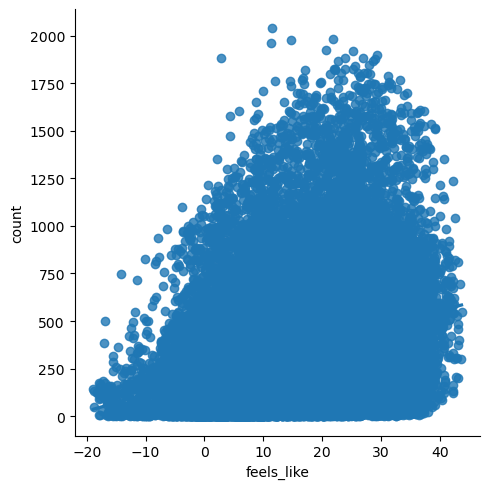

In [82]:
sns.lmplot(data=bike_df, x='feels_like', y='count')
plt.show()

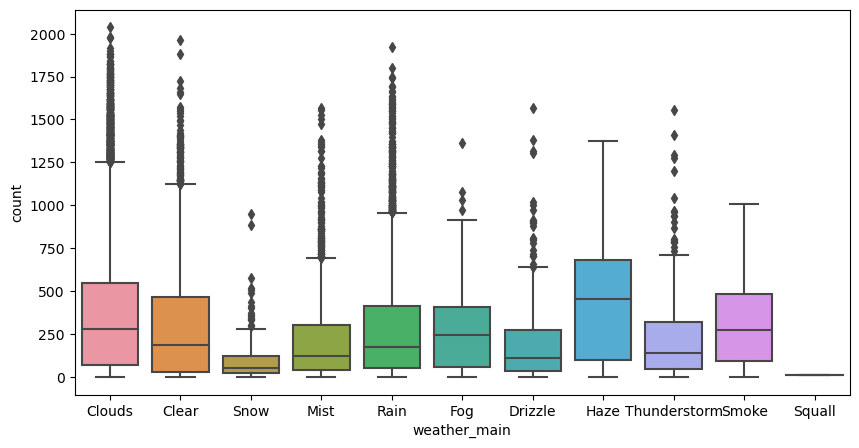

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bike_df,x='weather_main', y='count')
plt.show()

## 결측치 처리

In [84]:
bike_df.isnull().mean()

datetime        0.000000
count           0.000000
holiday         0.000000
workingday      0.000000
temp            0.000000
feels_like      0.000000
temp_min        0.000000
temp_max        0.000000
pressure        0.000000
humidity        0.000000
wind_speed      0.000000
wind_deg        0.000000
rain_1h         0.797148
snow_1h         0.990233
clouds_all      0.000000
weather_main    0.000000
dtype: float64

In [85]:
bike_df.isnull().sum()

datetime            0
count               0
holiday             0
workingday          0
temp                0
feels_like          0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
rain_1h         26608
snow_1h         33053
clouds_all          0
weather_main        0
dtype: int64

In [86]:
bike_df = bike_df.fillna(0)
bike_df.isnull().sum()

datetime        0
count           0
holiday         0
workingday      0
temp            0
feels_like      0
temp_min        0
temp_max        0
pressure        0
humidity        0
wind_speed      0
wind_deg        0
rain_1h         0
snow_1h         0
clouds_all      0
weather_main    0
dtype: int64

# 시간 데이터 처리

In [87]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       33379 non-null  float64
 13  snow_1h       33379 non-null  float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [89]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear


In [90]:
bike_df['datetime'].dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
33374    2021
33375    2021
33376    2021
33377    2021
33378    2021
Name: datetime, Length: 33379, dtype: int64

In [91]:
bike_df['datetime'].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
33374    8
33375    8
33376    8
33377    8
33378    8
Name: datetime, Length: 33379, dtype: int64

In [92]:
bike_df['datetime'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
33374    31
33375    31
33376    31
33377    31
33378    31
Name: datetime, Length: 33379, dtype: int64

In [93]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,1,0
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,1
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,1,2
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,1,3
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,1,4


In [94]:
bike_df['date'] = bike_df['datetime'].dt.date

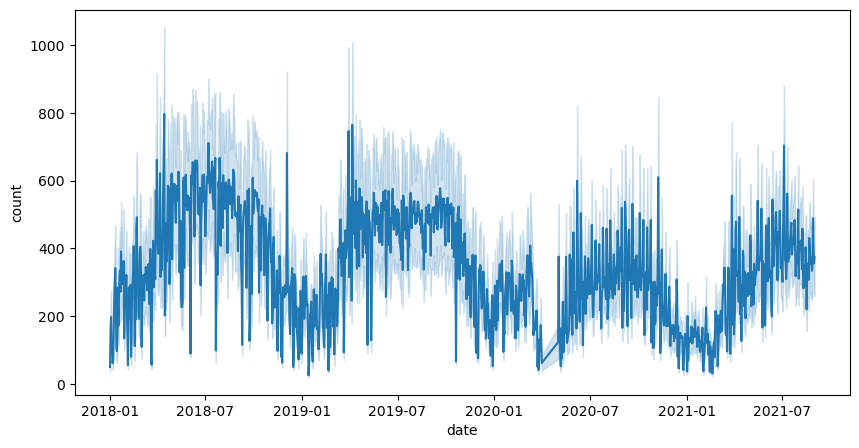

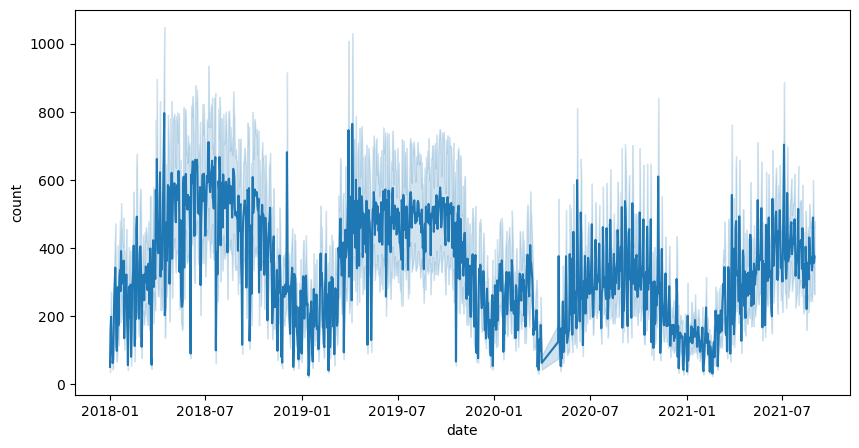

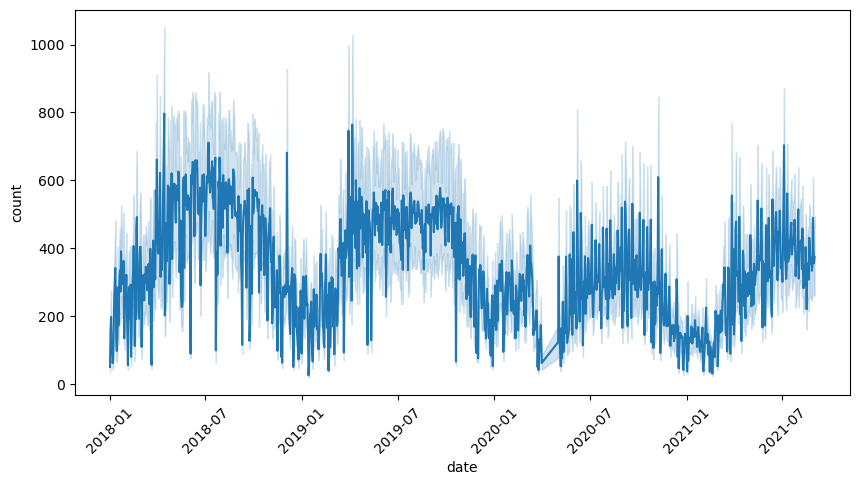

In [98]:
plt.figure(figsize=(10,5))
sns.lineplot(data=bike_df, x='date', y='count')
plt.xticks(rotation=45)
plt.show()

In [100]:
bike_df[bike_df['year']==2019].groupby('month')['count'].mean()

month
1     193.368862
2     221.857718
3     326.564456
4     482.931694
5     438.027848
6     478.480053
7     472.745785
8     481.267366
9     500.862069
10    446.279070
11    307.295393
12    213.148886
Name: count, dtype: float64

In [101]:
bike_df[bike_df['year']==2020].groupby('month')['count'].mean()

month
1     260.445997
2     255.894320
3     217.135241
5     196.581064
6     290.900937
7     299.811688
8     331.528809
9     338.876478
10    293.640777
11    240.507324
12    138.993540
Name: count, dtype: float64

In [102]:
bike_df[bike_df['year']==2021].groupby('month')['count'].mean()

month
1    129.363525
2    113.081115
3    222.504988
4    299.140921
5    337.126797
6    381.195155
7    418.996011
8    362.574803
Name: count, dtype: float64

In [106]:
def covid(date):
    if str(date) < '2020-04-01':
        return 'precovid'
    elif str(date) < '2021-04-01':
        return 'covid'
    else:
        return 'postcovid'

In [107]:
bike_df['covid'] = bike_df['date'].apply(covid)

0         precovid
1         precovid
2         precovid
3         precovid
4         precovid
           ...    
33374    postcovid
33375    postcovid
33376    postcovid
33377    postcovid
33378    postcovid
Name: date, Length: 33379, dtype: object

In [109]:
bike_df['covid'] = bike_df['date'].apply(lambda d: 'precovid' if str(d)<'2020-04-01' else 'covid' if str(d)<'2021-04-01' else 'postcovid')

In [110]:
bike_df['season'] = bike_df['month'].apply(lambda x: 'winter' if x==12 else 'fall' if x>=9 else 'summner' if x>=6 else 'spring' if x>=3 else 'winter')
bike_df[['month', 'season']]

,month,season
0,1,winter
1,1,winter
2,1,winter
3,1,winter
4,1,winter
...,...,...
33374,8,summner
33375,8,summner
33376,8,summner
33377,8,summner


In [113]:
bike_df['day_night'] = bike_df['hour'].apply(lambda h:
                      'night' if h>=21 else
                      'late evening' if h >= 19 else
                      'early evening' if h >= 17 else
                      'late afternoon' if h >= 16 else
                      'early afternoon' if h >= 13 else
                      'late morning' if h >= 11 else
                      'early morning' if h >= 5 else
                      'night'
                      )
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,...,snow_1h,clouds_all,weather_main,year,month,hour,date,covid,season,day_night
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,...,0.0,20,Clouds,2018,1,0,2018-01-01,precovid,winter,night
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,...,0.0,1,Clear,2018,1,1,2018-01-01,precovid,winter,night
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,...,0.0,1,Clear,2018,1,2,2018-01-01,precovid,winter,night
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,...,0.0,1,Clear,2018,1,3,2018-01-01,precovid,winter,night
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,...,0.0,1,Clear,2018,1,4,2018-01-01,precovid,winter,night


In [114]:
bike_df = bike_df.drop(['datetime', 'month', 'date'], axis=1)
bike_df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,covid,season,day_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,0,precovid,winter,night
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,precovid,winter,night
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,2,precovid,winter,night
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,3,precovid,winter,night
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,4,precovid,winter,night


## 더미변수 만들기

In [115]:
for column_name in ['weather_main','hour','covid','season','day_night']:
    print(column_name, bike_df[column_name].nunique())

weather_main 11
hour 24
covid 3
season 4
day_night 7


In [116]:
bike_df['weather_main'].value_counts()

Clouds          22157
Rain             5649
Clear            2669
Mist             1736
Thunderstorm      324
Drizzle           308
Snow              299
Fog               123
Haze               67
Smoke              46
Squall              1
Name: weather_main, dtype: int64

In [118]:
bike_df = pd.get_dummies(bike_df, columns=['weather_main','hour','covid','season','day_night'])
bike_df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,season_spring,season_summner,season_winter,day_night_early afternoon,day_night_early evening,day_night_early morning,day_night_late afternoon,day_night_late evening,day_night_late morning,day_night_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,...,0,0,1,0,0,0,0,0,0,1
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,...,0,0,1,0,0,0,0,0,0,1
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,...,0,0,1,0,0,0,0,0,0,1
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,...,0,0,1,0,0,0,0,0,0,1
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,...,0,0,1,0,0,0,0,0,0,1


# 모델링

In [119]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(bike_df.drop('count', axis=1), bike_df['count'], test_size=0.3, random_state=100)

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
dt = DecisionTreeRegressor(random_state=100)

In [123]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [125]:
y_pred = dt.predict(X_test)

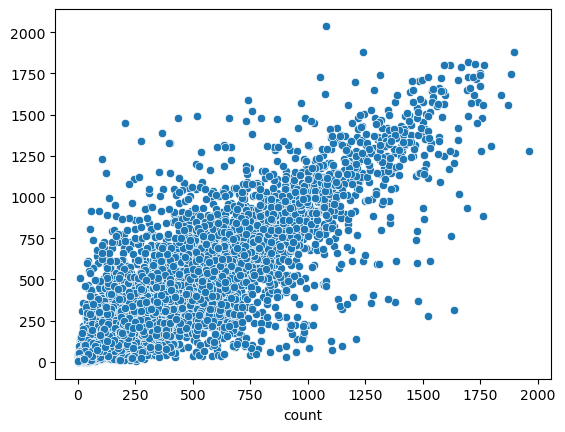

In [127]:
sns.scatterplot(x=y_test, y=y_pred)
plt.show()

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
mean_squared_error(y_test, y_pred, squared=False)

157.25436715593796

## LinearRegression 과의 비교

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr = LinearRegression()

In [132]:
lr.fit(X_train, y_train)

LinearRegression()

In [133]:
y_pred2 = lr.predict(X_test)

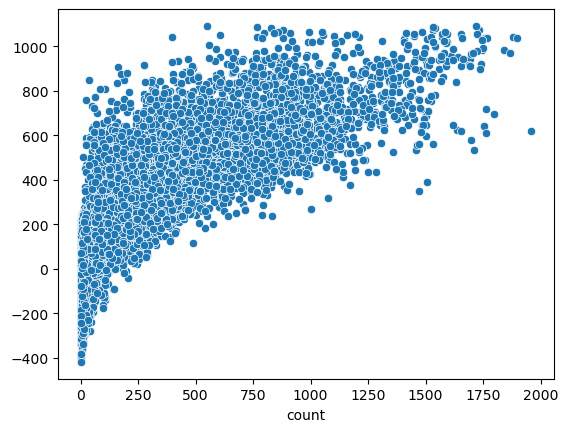

In [134]:
sns.scatterplot(x=y_test, y=y_pred2)
plt.show()

In [135]:
mean_squared_error(y_test, y_pred2, squared=False)

206.04450974570267

In [136]:
# lr.fit(X_train, np.log(y_train)) # error

C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input y contains infinity or a value too large for dtype('float64').

In [137]:
y_train.sort_values() # 0이 있으면 안됨

21511       0
10727       0
1304        0
19240       0
28551       0
         ... 
6014     1917
4016     1922
8678     1976
2642     1981
2469     2038
Name: count, Length: 23365, dtype: int64

In [138]:
lr.fit(X_train, np.log(y_train+1))

LinearRegression()

In [139]:
y_pred3 = lr.predict(X_test)

In [140]:
y_pred3 = np.exp(y_pred3) -1

In [141]:
mean_squared_error(y_test, y_pred3, squared=False)

204.4580607035578

## 하이퍼 파라미터 튜닝

In [143]:
dt = DecisionTreeRegressor(random_state=100, max_depth=50, min_samples_leaf=30)

In [144]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=30, random_state=100)

In [145]:
y_pred4 = dt.predict(X_test)

In [146]:
mean_squared_error(y_test, y_pred4, squared=False)

138.70125316348356

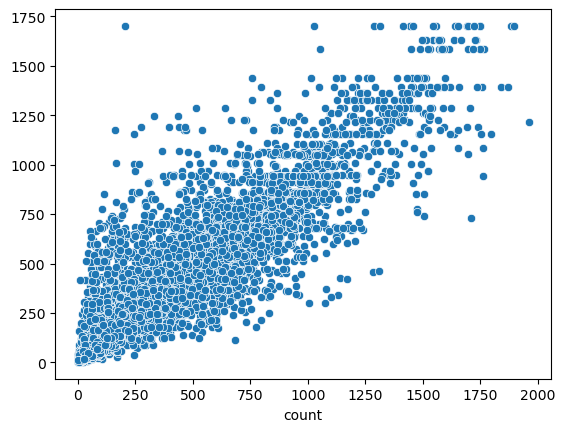

In [166]:
sns.scatterplot(x=y_test, y=y_pred4)
plt.show()

## 트리 플랏

In [147]:
from sklearn.tree import plot_tree

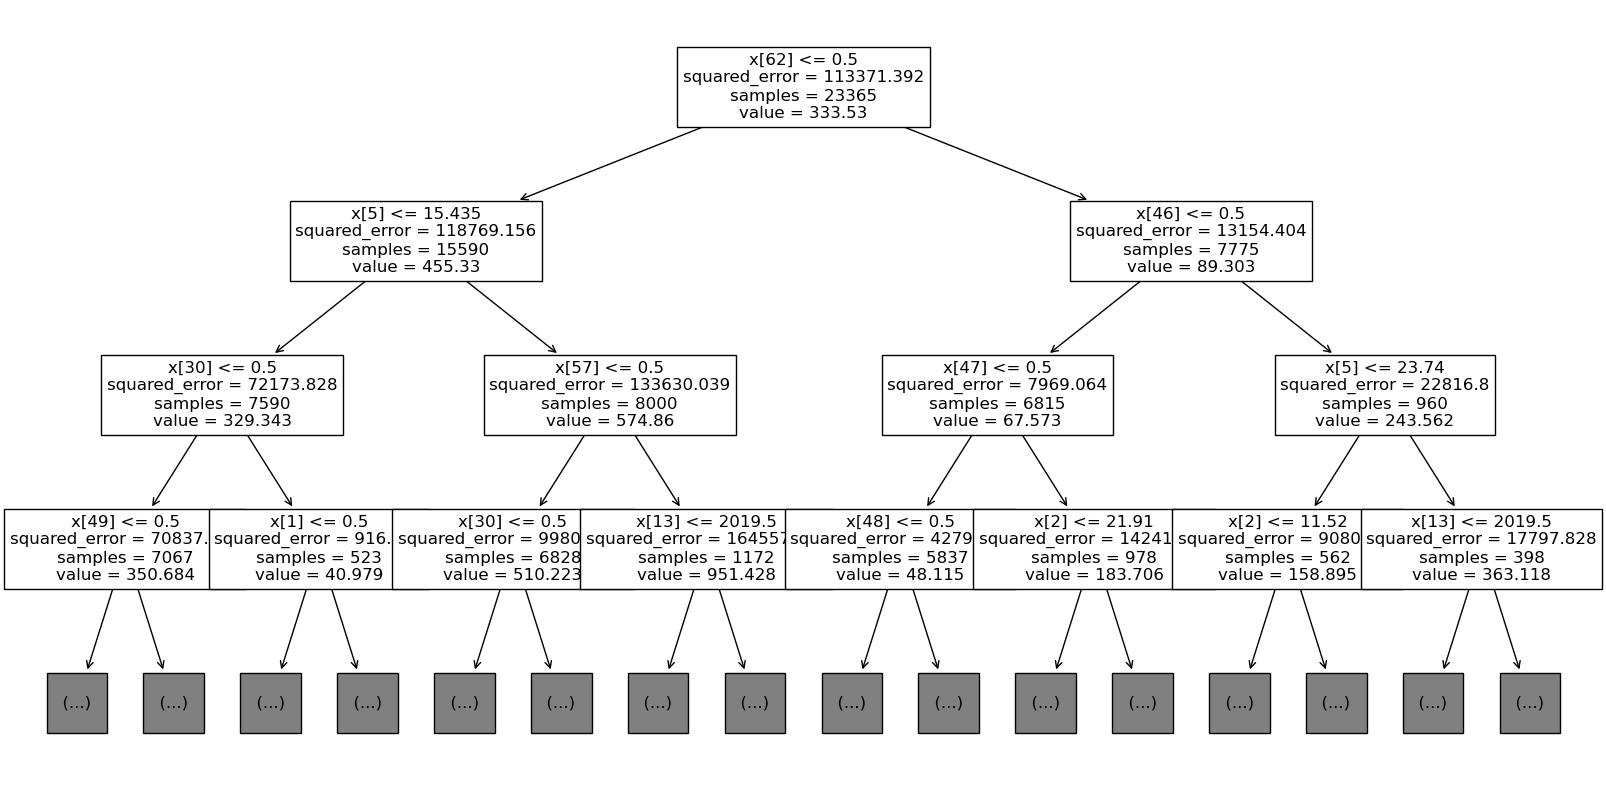

In [154]:
plt.figure(figsize=(20,10))
plot_tree(dt, max_depth=3, fontsize=12) # max_depth 학습 결과를 바꾸진 않음
plt.show()

In [158]:
X_train.columns

Index(['holiday', 'workingday', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'snow_1h',
       'clouds_all', 'year', 'weather_main_Clear', 'weather_main_Clouds',
       'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze',
       'weather_main_Mist', 'weather_main_Rain', 'weather_main_Smoke',
       'weather_main_Snow', 'weather_main_Squall', 'weather_main_Thunderstorm',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'covid_covid',
       'covid_postcovid', 'covid_precovid', 'season_fall', 'season_spring',
       'season_summner', 'season_winter', 'day_night_early afternoon',
       'day_night_early evening', 'day_night_early morning',
       'day_night_late afternoon', 'day_n

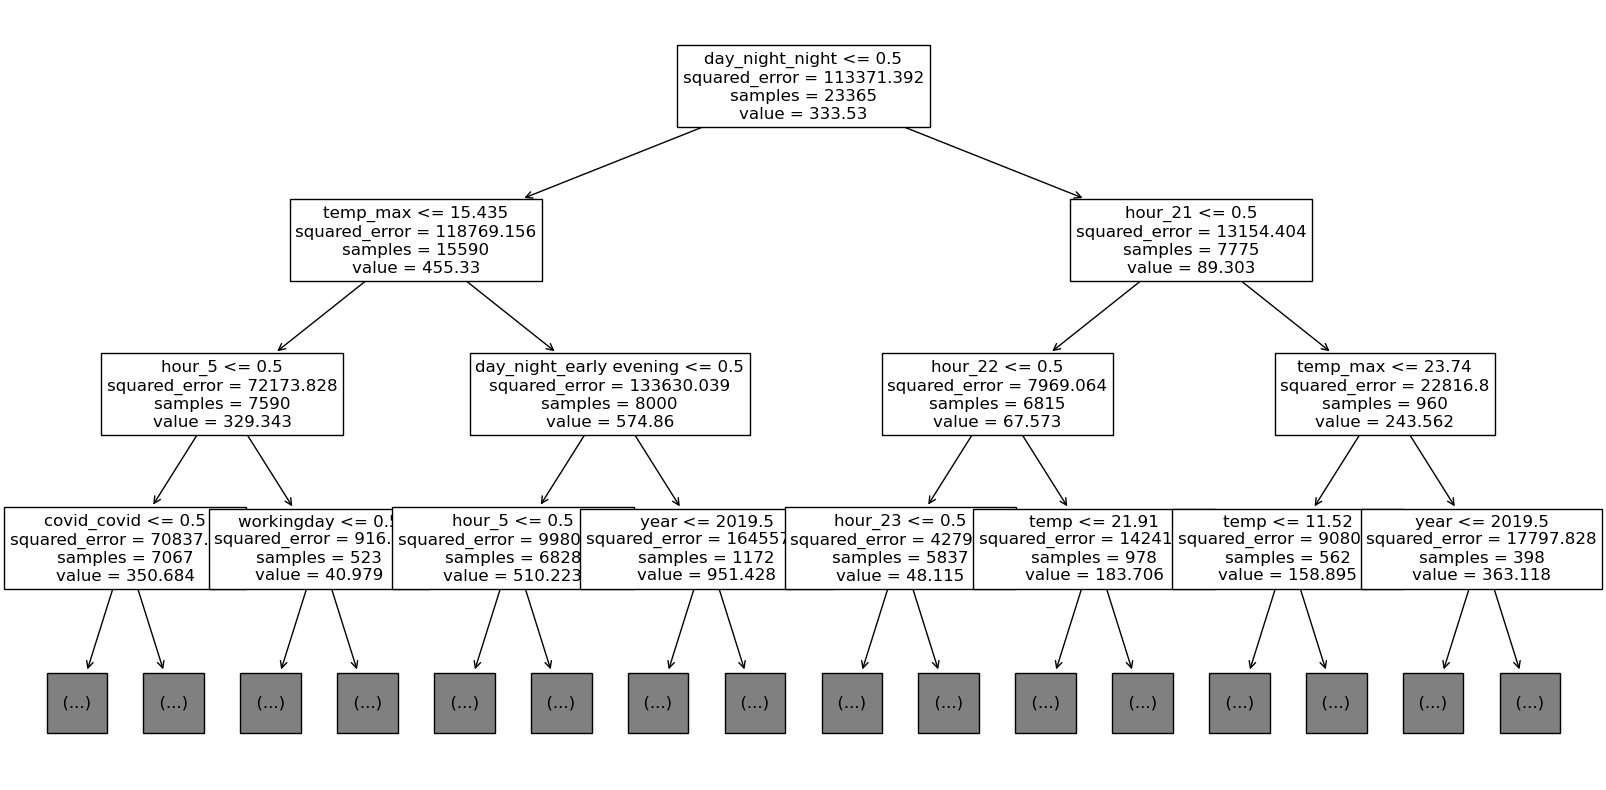

In [164]:
plt.figure(figsize=(20,10))
plot_tree(dt, max_depth=3, fontsize=12, feature_names=list(X_train.columns)) # max_depth 학습 결과를 바꾸진 않음
plt.show()

In [165]:
len(X_train)

23365